## group_35

## 3. Write a function to implement FFT for 1D signal.

In [4]:
import math
import cv2
import numpy as np
def dft(vals):
    m=len(vals)
    ans=np.zeros(m,dtype = 'complex_')
    for u in range(0,m):
        temp=0
        for x in range(0,m):
            temp+=vals[x]*np.exp(((-2j)*(np.pi)*u*x)/m)
        ans[u]=temp
    return ans
def fft(vals):
    l=len(vals)
    G=[]
    H=[]
    odd=[]
    even=[]
    if l<=1:
        return(dft(vals))
    else:
        even = vals[0::2]
        odd =  vals[1::2]
        G=(fft(even)).copy()
        #print(len(G))
        H=(fft(odd)).copy()
        #print(len(H))
        ans=[]
        for u in range(0,int(l/2)):
            v1=G[u]+np.multiply(np.exp(-2j*np.pi*u/l),H[u])
            ans.append(v1)
        for u in range(int(l/2),l):
            v2=G[u-int(l/2)]-np.multiply(np.exp(-2j*np.pi*(u-int(l/2))/l),H[u-int(l/2)])
            ans.append(v2)   
    return(ans)
vals=[1,2,3,4,5,6,7,8]
#dft(vals)
print("User Defined :\n",fft(vals))
print("inbuilt:\n",np.fft.fft(vals))

User Defined :
 [(36+0j), (-4+9.65685424949238j), (-4+4j), (-4+1.6568542494923797j), (-4+0j), (-4-1.6568542494923806j), (-3.9999999999999996-4j), (-3.9999999999999987-9.65685424949238j)]
inbuilt:
 [36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]


## 4. Implement DFT function for an image using the FFT for 1D signal using question 3.

In [3]:
import cv2
import numpy as np
import pandas as pd
img = cv2.imread("lena.png",0)
def img_fft(img):
    row=[]
    col=[]
    res1 = np.array(img)
    for i in res1:
        row.append(fft(i))
    res2 = np.array(row)    
    for j in res2.T:
        col.append(fft(j))
    res = np.array(col)
    return res.T
print("user defined :\n",img_fft(img))
print("inbuilt function :\n",np.fft.fft2(img))

user defined :
 [[ 3.47150210e+07      +0.j         -4.56574842e+05+2164544.56601674j
   1.52208185e+06-1188744.34545086j ... -2.74594442e+05 -541856.23885154j
   1.52208185e+06+1188744.34545086j -4.56574842e+05-2164544.56601674j]
 [ 3.03060258e+04-1254352.11868502j -1.65318041e+06+1443256.09933483j
  -1.03047308e+06 +295625.94086566j ...  5.81429005e+05 +694299.50189837j
  -3.23146799e+05 +530172.14398945j  8.28827982e+04 +747288.29705214j]
 [-3.71339693e+05 -259159.6100419j  -2.73455353e+05  -96560.84121478j
   5.98253549e+05 -417384.05377513j ...  3.25457890e+05 +837215.92343231j
  -6.41543938e+05 -139288.98145976j  7.12638499e+05  -45587.21465757j]
 ...
 [ 5.03855090e+05 -170439.65910213j  6.80178798e+05 +661056.25759734j
  -4.51446673e+05 -196345.92584117j ...  9.43802904e+05 +134035.4765524j
   1.56184977e+05 -704857.7166025j  -1.08837489e+05 +617483.84937095j]
 [-3.71339693e+05 +259159.6100419j   7.12638499e+05  +45587.21465757j
  -6.41543938e+05 +139288.98145975j ... -5.1412129

## 5. Consider the images of lena and dog images attached. Find phase and magnitude of the dog and lena images using DFT function implemented in question 4.

In [4]:
import cmath 
dog = cv2.imread("dog.tif",0)
lena=cv2.imread("lena.png",0)
def magnitude(matrix):
    mag=[]
    for i in range(0,matrix.shape[0]):
        each=[]
        for j in range(0,matrix.shape[1]):
            each.append(((matrix[i][j].real)*(matrix[i][j].real) + (matrix[i][j].imag)*(matrix[i][j].imag))**0.5)
        mag.append(each)
    mag=np.array(mag)
    return mag
def phase(matrix):
    phase=[]
    for i in range(0,matrix.shape[0]):
        each=[]
        for j in range(0,matrix.shape[1]):
            each.append((cmath.phase(matrix[i][j])))
        phase.append(each)
    phase=np.array(phase)
    return phase
fft_lena = img_fft(img)
fft_dog = img_fft(dog)
m_lena=magnitude(fft_lena)
m_dog=magnitude(fft_dog)
p_lena=phase(fft_lena)
p_dog=phase(fft_dog)


In [5]:
print("Magnitude of Lena : \n")
print(m_lena)
print("\nPhase of Lena : \n")
print(p_lena)

Magnitude of Lena : 

[[34715021.          2212173.9906588   1931280.99058116 ...
    607462.17281187  1931280.99058116  2212173.9906588 ]
 [ 1254718.17267894  2194537.22417212  1072039.86064662 ...
    905600.06969689   620891.58149928   751870.57207739]
 [  452832.05582332   290003.14812522   729463.33532809 ...
    898250.1548929    656490.70440755   714095.10866841]
 ...
 [  531901.89806146   948492.7898149    492296.47723064 ...
    953273.0090489    721954.39443222   627002.31521659]
 [  452832.05582332   714095.10866841   656490.70440755 ...
    867137.5117324    729463.33532809   290003.14812522]
 [ 1254718.17267894   751870.57207739   620891.58149928 ...
   1887941.4350893   1072039.86064662  2194537.22417212]]

Phase of Lena : 

[[ 0.          1.77868237 -0.66304709 ... -2.03984226  0.66304709
  -1.77868237]
 [-1.54664033  2.42388636  2.86221216 ...  0.87364371  2.11818131
   1.46033638]
 [-2.53227451 -2.8021466  -0.60916106 ...  1.20003586 -2.92779557
  -0.06388258]
 ...
 [-

In [6]:
print("\nMagnitude of Dog : \n")
print(m_dog)
print("\nPhase of Dog : \n")
print(p_dog)


Magnitude of Dog : 

[[40531043.          6036930.17994522  1662167.95424632 ...
   1027406.06787023  1662167.95424632  6036930.17994522]
 [ 3735877.53938686  1592519.18128704   979365.88066808 ...
   2827024.23774441  2798749.60742086  3432375.0582589 ]
 [ 1583548.98267294  1988626.70944624   283577.19815406 ...
   1440453.19670346   239174.06604076  1425932.94618479]
 ...
 [ 2156365.42062572   555171.03103125   746526.79190841 ...
    588966.08542858   894586.64146856  1812031.4351561 ]
 [ 1583548.98267294  1425932.94618479   239174.06604076 ...
    991380.36414638   283577.19815406  1988626.70944624]
 [ 3735877.53938686  3432375.0582589   2798749.60742086 ...
   1206153.71061634   979365.88066808  1592519.18128704]]

Phase of Dog : 

[[ 0.         -0.63291937 -0.26230343 ...  3.14003139  0.26230343
   0.63291937]
 [ 0.06570084 -2.50229136 -0.29438267 ...  1.20909133 -2.27258235
  -2.48734557]
 [ 1.7491548  -1.81082727  2.88069761 ... -2.21181388 -0.09502596
  -0.03364992]
 ...
 [ 1

##  6.Swap phase of the dog image and magnitude of the lena image and display the output.

According to the question, the following magnitude-phase combinations have been implemented 

###     MAGNITUDE    -     PHASE
       dog phase     -    lena phase 
       dog magnitude -    lena magnitude


In [7]:
import numpy as np
phase_dog_phase_lena=p_dog*(np.exp(1j*p_lena))
mag_dog_mag_lena=m_dog*(np.exp(1j*m_lena))


In [8]:
def idft(sig):
    F=[]
    M=len(sig)
    for u in range(0,M):
        temp=0
        for x in range(0,M):
            temp+=(sig[x]*(np.exp((2j)*np.pi*u*x/M)))
        F.append(temp/M)
    return(F)
def idft_real_retain(img):
    result = idft(img)
    realp=[]
    for i in result:
        realp.append(i.real)
    return realp

In [9]:
from matplotlib import pyplot as plt
def reconstruct(img):
    row=[]
    col=[]
    m,n=img.shape
    res1 = np.array(img)
    for p in res1:
        row.append(idft_real_retain(p))
    res2 = np.array(row)
    for p in res2.T:
        col.append(idft_real_retain(p))
    res = np.array(col)
    return (res.T/(m*n))

phase_dog_phase_lena


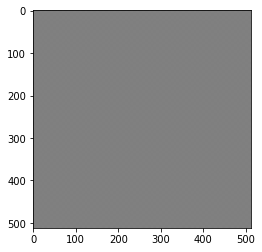

mag_dog_mag_lena


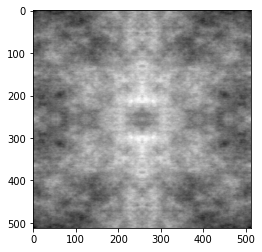

In [10]:
img_pdpl = reconstruct(phase_dog_phase_lena)
img_mdml = reconstruct(mag_dog_mag_lena)
print("phase_dog_phase_lena")
plt.imshow(img_pdpl,cmap='gray')
plt.show()
print("mag_dog_mag_lena")
plt.imshow(img_mdml,cmap='gray')
plt.show()

## 7. Swap phase of the lena image and magnitude of the dog image ad display the output

According to the question, the following magnitude-phase combinations have been implemented 

###     MAGNITUDE    -     PHASE
       lena phase     -    dog phase 
       lena magnitude  -   dog magnitude


phase_lena_phase_dog


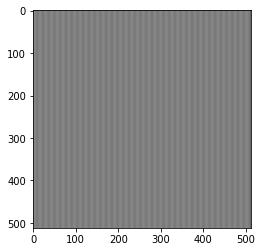

mag_lena_mag_dog


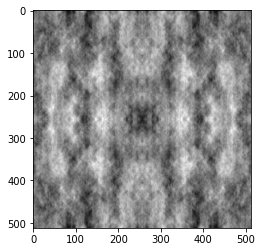

In [11]:
phase_lena_phase_dog=p_lena*(np.exp(1j*p_dog))
mag_lena_mag_dog=m_lena*(np.exp(1j*m_dog))
img_plpd = reconstruct(phase_lena_phase_dog)
img_mlmp = reconstruct(mag_lena_mag_dog)
print("phase_lena_phase_dog")
plt.imshow(img_plpd,cmap='gray')
plt.show()
print("mag_lena_mag_dog")
plt.imshow(img_mlmp,cmap='gray')
plt.show()

# FOR QUE 6 and QUE 7, the other possible combinations of phase and magnitude of lena and dog images are :



###     MAGNITUDE    -     PHASE
       lena magnitude   -  dog phase 
       dog magnitude    -  lena phase


lena_mag_dog_phase


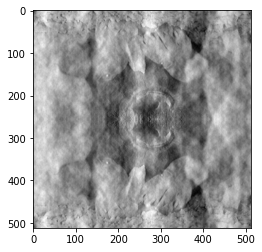

dog_mag_lena_phase


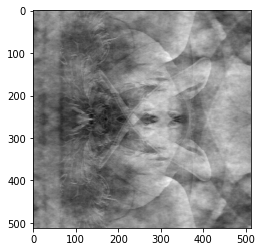

In [15]:
lena_mag_dog_phase = m_lena*(np.exp(1j*p_dog))
dog_mag_lena_phase = m_dog*(np.exp(1j*p_lena))
img_mlpd = reconstruct(lena_mag_dog_phase)
img_mdpl = reconstruct(dog_mag_lena_phase)
print("lena_mag_dog_phase")
plt.imshow(img_mlpd,cmap='gray')
plt.show()
print("dog_mag_lena_phase")
plt.imshow(img_mdpl,cmap='gray')
plt.show()

In [ ]:
# PHASE SEEMS TO HOLD MORE INFORMATION THAN MAGNITUDE